In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import re

def load_all_aggregated_data() -> dict:
    """Load all aggregated data for various configurations: input dimensions, pseudo rehearsal, and optimizer.
    
    Returns:
    - all_data (dict): A nested dictionary with keys as input dimensions, pseudorehearsal, and optimizer 
                       and values as the loaded data.
    """
    all_data = {}
    save_folder = "aggregated_results"
    
    # Get all files in the folder with the .npy extension
    files = [f for f in os.listdir(save_folder) if f.endswith(".npy")]

    # Extract the configuration details from the file name using regex
    pattern = re.compile(r"input_dim_(\d+)_(True|False)_(\w+).npy")

    for file in files:
        match = pattern.match(file)
        if match:
            dim = int(match.group(1))
            pseudo_rehearsal = True if match.group(2) == 'True' else False
            optimizer = match.group(3)
            
            if dim not in all_data:
                all_data[dim] = {}
            
            if pseudo_rehearsal not in all_data[dim]:
                all_data[dim][pseudo_rehearsal] = {}
            
            save_path = os.path.join(save_folder, file)
            data = np.load(save_path, allow_pickle=True).item()
            all_data[dim][pseudo_rehearsal][optimizer] = data

    return all_data 

# Example usage:
loaded_data_dict = load_all_aggregated_data()
#for dim, pseudo_rehearsal_data in loaded_data_dict.items():
#    for pseudo, optimizer_data in pseudo_rehearsal_data.items():
#        for optimizer, data in optimizer_data.items():
#            print(f"Data for dimension {dim}, pseudorehearsal: {pseudo}, optimizer: {optimizer} has keys: \n\n {data.keys()} \n\n")



In [2]:
loaded_data_dict[1][False]['adam']['min_distance']

array([0.61429289, 0.36618569, 0.70901581, ..., 0.37746222, 0.03122958,
       0.70810078])

In [3]:
loaded_data_dict[1][True]['adam']['min_distance']

array([0.39157472, 0.32947468, 0.08970627, ..., 0.30788096, 0.02022735,
       0.45034762])

In [35]:
def get_perturbation_labels(output_dim: int = 1,
                            hidden_units_wide: int = 1000,
                            hidden_units_deep: int = 16,
                            hidden_layers: int = 8,
                            num_exps: int = 6) -> dict:
    """Generate dictionary of perturbation labels with given configurations."""
    
    model_descriptions = [
        'Linear Model',
        f"Wide ReLU ANN",
        f"Deep ReLU ANN",
        'One Parameter'
    ]

    for partition_num in [1, 2, 4, 8, 10]:
        model_descriptions.extend([
            f"Spline ANN (z={partition_num})",
            f"Lookup Table (z={partition_num})",
            f"ABEL-Spline (z={partition_num})"
        ])

    # Model perturbation labels
    perturbation_labels = {f"model_{i}_perturbations": desc for i, desc in enumerate(model_descriptions)}
    
    # Adding the distance labels
    perturbation_labels["min_distance"] = "Min Absolute Difference"
    perturbation_labels["max_distance"] = "Max Absolute Difference"

    return perturbation_labels

# Example usage:
perturbation_labels_dict = get_perturbation_labels()
for key, value in perturbation_labels_dict.items():
    print(f"{key} -> {value}")


model_0_perturbations -> Linear Model
model_1_perturbations -> Wide ReLU ANN
model_2_perturbations -> Deep ReLU ANN
model_3_perturbations -> One Parameter
model_4_perturbations -> Spline ANN (z=1)
model_5_perturbations -> Lookup Table (z=1)
model_6_perturbations -> ABEL-Spline (z=1)
model_7_perturbations -> Spline ANN (z=2)
model_8_perturbations -> Lookup Table (z=2)
model_9_perturbations -> ABEL-Spline (z=2)
model_10_perturbations -> Spline ANN (z=4)
model_11_perturbations -> Lookup Table (z=4)
model_12_perturbations -> ABEL-Spline (z=4)
model_13_perturbations -> Spline ANN (z=8)
model_14_perturbations -> Lookup Table (z=8)
model_15_perturbations -> ABEL-Spline (z=8)
model_16_perturbations -> Spline ANN (z=10)
model_17_perturbations -> Lookup Table (z=10)
model_18_perturbations -> ABEL-Spline (z=10)
min_distance -> Min Absolute Difference
max_distance -> Max Absolute Difference


In [5]:
import pandas as pd

def create_nested_dataframe_dict(loaded_data_dict: dict) -> dict:
    """Create a nested dictionary of pandas DataFrames using loaded data."""
    return {
        dim: {
            pseudo: {
                optimizer: pd.DataFrame(data)
                for optimizer, data in optimizer_data.items()
            }
            for pseudo, optimizer_data in pseudo_rehearsal_data.items()
        }
        for dim, pseudo_rehearsal_data in loaded_data_dict.items()
    }

# Example usage:
df_dict = create_nested_dataframe_dict(loaded_data_dict)


In [6]:
df_dict[1][False]['adam']

,min_distance,max_distance,model_0_perturbations,model_1_perturbations,model_2_perturbations,model_3_perturbations,model_4_perturbations,model_5_perturbations,model_6_perturbations,model_7_perturbations,...,model_9_perturbations,model_10_perturbations,model_11_perturbations,model_12_perturbations,model_13_perturbations,model_14_perturbations,model_15_perturbations,model_16_perturbations,model_17_perturbations,model_18_perturbations
0,0.614293,0.614293,0.662238,1.709561,1.613594,1.709420,0.012064,1.709420,0.011309,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.366186,0.366186,1.087361,1.930459,1.638502,1.709420,0.358189,1.709420,0.344623,0.000281,...,0.000235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.709016,0.709016,0.499934,1.709561,1.624648,1.709420,0.000131,1.709420,0.000124,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.180505,0.180505,1.405518,2.288970,1.694103,1.709420,1.088165,1.709420,1.092970,0.397629,...,0.343803,0.001574,1.687461,0.001299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.005596,0.005596,1.705219,2.626685,1.734866,1.709420,1.695313,1.709420,1.771152,1.714523,...,1.620155,1.709000,1.687461,1.605801,1.725992,1.716216,1.727187,1.674458,1.732917,1.704944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.651437,0.651437,1.227429,0.434185,1.642785,1.849512,0.004026,1.849512,0.003541,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14996,0.149678,0.149678,2.149864,1.173709,1.747997,1.849512,1.323195,1.849512,1.250959,0.639184,...,0.597494,0.012511,1.783382,0.010889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14997,0.377462,0.377462,1.731106,0.602325,1.688142,1.849512,0.351782,1.849512,0.310023,0.000246,...,0.000224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14998,0.031230,0.031230,2.367621,1.318193,1.801117,1.849512,1.778823,1.849512,1.758448,1.671600,...,1.685814,1.488513,1.783382,1.423437,0.953896,1.847963,0.885852,0.535055,0.000000,0.505187


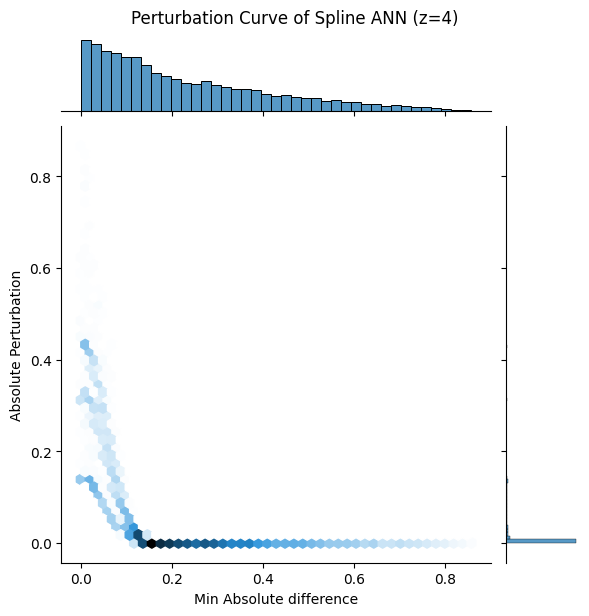

In [7]:
# Alternatively, using jointplot for a scatter plot with histograms

optimizer_choice = 'sgd'
pseudo_rehears_choice = False
dimension_choice = 2

distance_choice = 0

model_choice = 10


distance_key = ['min_distance', 'max_distance'][distance_choice]  # Choose min (0) or max (1)

#specific_df = dataframes_dict[input_dimension]
specific_df = df_dict[dimension_choice][pseudo_rehears_choice][optimizer_choice]

model_key = f'model_{model_choice}_perturbations'

labels = get_perturbation_labels()


sns.jointplot(x=distance_key, y=model_key, data=specific_df, kind='hex')
plt.suptitle(f'Perturbation Curve of {labels[model_key]}', y=1.02)
plt.ylabel('Absolute Perturbation')
plt.xlabel(labels[distance_key])
plt.show()

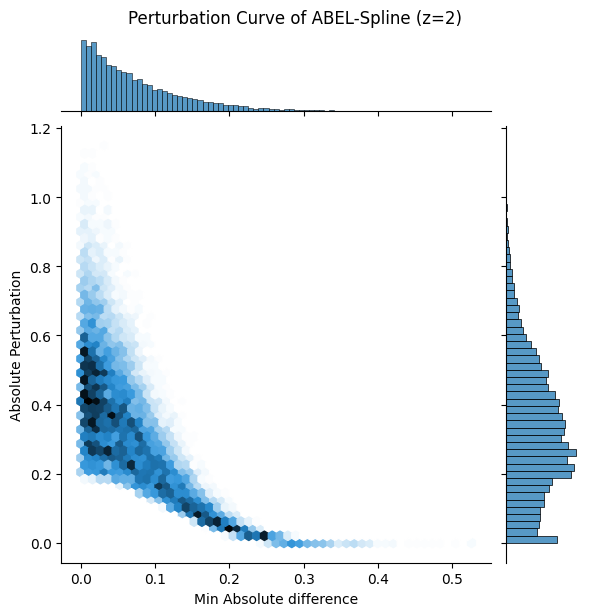

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(df_dict: dict, 
                      optimizer_choice: str = 'sgd', 
                      pseudo_rehears_choice: bool = False, 
                      dimension_choice: int = 2, 
                      distance_choice: int = 0, 
                      model_choice: int = 10) -> None:
    """
    Plot a jointplot with histograms for chosen parameters.

    Parameters:
    - df_dict (dict): Nested dictionary of dataframes.
    - optimizer_choice (str): Optimizer choice. Default is 'sgd'.
    - pseudo_rehears_choice (bool): Pseudorehearsal choice. Default is False.
    - dimension_choice (int): Input dimension choice. Default is 2.
    - distance_choice (int): Distance choice, 0 for 'min_distance' and 1 for 'max_distance'. Default is 0.
    - model_choice (int): Model choice. Default is 10.
    """

    # Mapping for the distance choice
    distance_key = ['min_distance', 'max_distance'][distance_choice]
    specific_df = df_dict[dimension_choice][pseudo_rehears_choice][optimizer_choice]
    model_key = f'model_{model_choice}_perturbations'

    labels = get_perturbation_labels()

    # Plotting
    sns.jointplot(x=distance_key, y=model_key, data=specific_df, kind='hex')
    plt.suptitle(f'Perturbation Curve of {labels[model_key]}', y=1.02)
    plt.ylabel('Absolute Perturbation')
    plt.xlabel(labels[distance_key])
    plt.show()

# Example usage:
plot_distribution(df_dict, 
                  optimizer_choice='sgd', 
                  pseudo_rehears_choice=False, 
                  dimension_choice=6, 
                  distance_choice=0, 
                  model_choice=9)


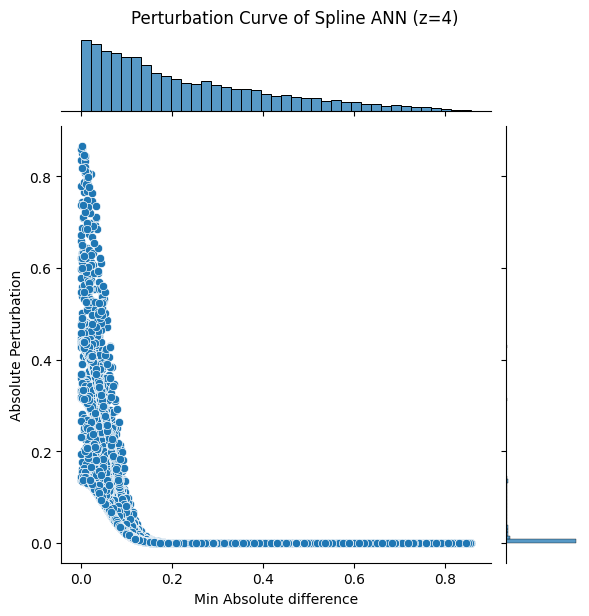

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def scatterplot(df_dict: dict, 
                optimizer_choice: str = 'sgd', 
                pseudo_rehears_choice: bool = False, 
                dimension_choice: int = 2, 
                distance_choice: int = 0, 
                model_choice: int = 10) -> None:
    """
    Plot a scatter plot for the chosen parameters.

    Parameters:
    - df_dict (dict): Nested dictionary of dataframes.
    - optimizer_choice (str): Optimizer choice. Default is 'sgd'.
    - pseudo_rehears_choice (bool): Pseudorehearsal choice. Default is False.
    - dimension_choice (int): Input dimension choice. Default is 2.
    - distance_choice (int): Distance choice, 0 for 'min_distance' and 1 for 'max_distance'. Default is 0.
    - model_choice (int): Model choice. Default is 10.
    """

    # Mapping for the distance choice
    distance_key = ['min_distance', 'max_distance'][distance_choice]
    specific_df = df_dict[dimension_choice][pseudo_rehears_choice][optimizer_choice]
    model_key = f'model_{model_choice}_perturbations'

    labels = get_perturbation_labels()

    # Plotting
    sns.jointplot(x=distance_key, y=model_key, data=specific_df, kind='scatter')
    plt.suptitle(f'Perturbation Curve of {labels[model_key]}', y=1.02)
    plt.ylabel('Absolute Perturbation')
    plt.xlabel(labels[distance_key])
    plt.show()

# Example usage:
scatterplot(df_dict, 
            optimizer_choice='sgd', 
            pseudo_rehears_choice=False, 
            dimension_choice=2, 
            distance_choice=0, 
            model_choice=10)


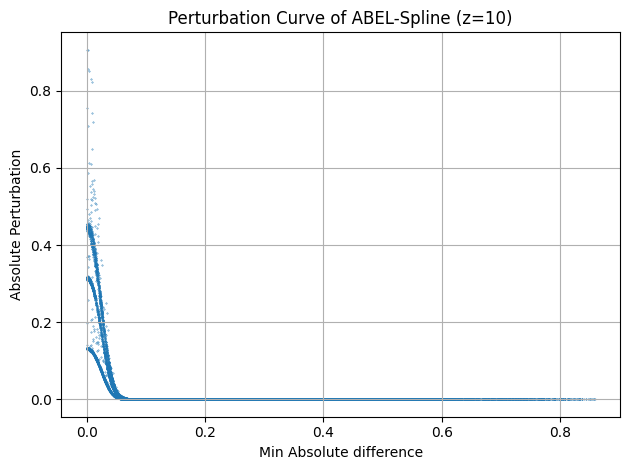

In [15]:
import matplotlib.pyplot as plt

def scatterplot(df_dict: dict, 
                optimizer_choice: str = 'sgd', 
                pseudo_rehears_choice: bool = False, 
                dimension_choice: int = 2, 
                distance_choice: int = 0, 
                model_choice: int = 10) -> None:
    """
    Plot a scatter plot for the chosen parameters using pyplot.

    Parameters:
    - df_dict (dict): Nested dictionary of dataframes.
    - optimizer_choice (str): Optimizer choice. Default is 'sgd'.
    - pseudo_rehears_choice (bool): Pseudorehearsal choice. Default is False.
    - dimension_choice (int): Input dimension choice. Default is 2.
    - distance_choice (int): Distance choice, 0 for 'min_distance' and 1 for 'max_distance'. Default is 0.
    - model_choice (int): Model choice. Default is 10.
    """

    # Mapping for the distance choice
    distance_key = ['min_distance', 'max_distance'][distance_choice]
    specific_df = df_dict[dimension_choice][pseudo_rehears_choice][optimizer_choice]
    model_key = f'model_{model_choice}_perturbations'

    labels = get_perturbation_labels()

    # Plotting using pyplot
    plt.scatter(specific_df[distance_key], specific_df[model_key], s=0.1)
    plt.title(f'Perturbation Curve of {labels[model_key]}')
    plt.ylabel('Absolute Perturbation')
    plt.xlabel(labels[distance_key])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
scatterplot(df_dict, 
            optimizer_choice='sgd', 
            pseudo_rehears_choice=False, 
            dimension_choice=2, 
            distance_choice=0, 
            model_choice=18)


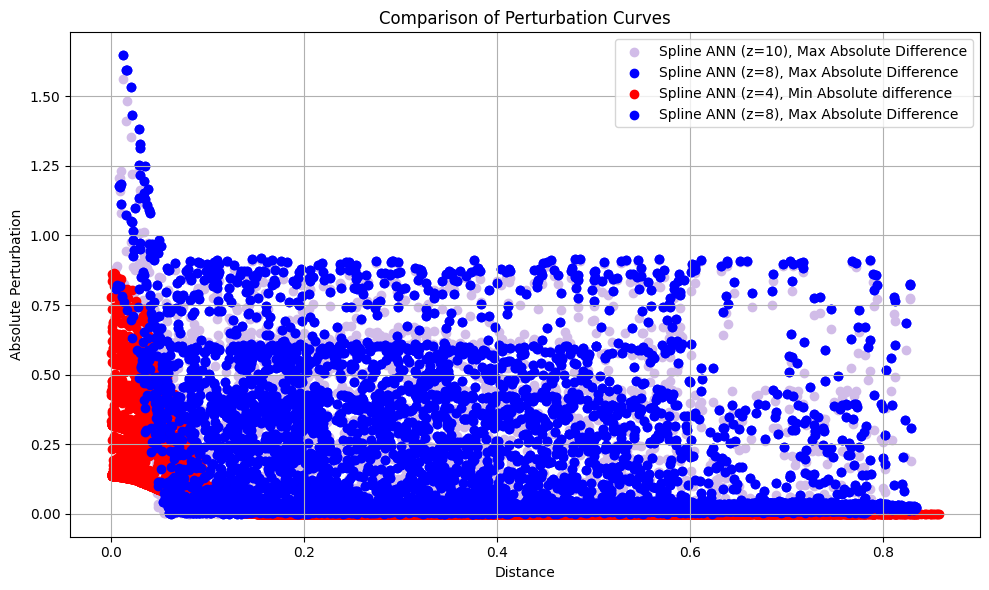

In [21]:
import matplotlib.pyplot as plt

def multi_scatterplot(df_dict: dict, 
                      selections: list) -> None:
    """
    Plot multiple scatter plots on the same axes for comparison.

    Parameters:
    - df_dict (dict): Nested dictionary of dataframes.
    - selections (list): A list of selection tuples. Each tuple should have the following format:
        (optimizer_choice, pseudo_rehears_choice, dimension_choice, distance_choice, model_choice, color)
    """

    plt.figure(figsize=(10, 6))
    labels = get_perturbation_labels()

    for sel in selections:
        optimizer_choice, pseudo_rehears_choice, dimension_choice, distance_choice, model_choice, color = sel
        distance_key = ['min_distance', 'max_distance'][distance_choice]
        specific_df = df_dict[dimension_choice][pseudo_rehears_choice][optimizer_choice]
        model_key = f'model_{model_choice}_perturbations'
        
        plt.scatter(specific_df[distance_key], specific_df[model_key], c=color, label=f'{labels[model_key]}, {labels[distance_key]}')

    plt.title('Comparison of Perturbation Curves')
    plt.ylabel('Absolute Perturbation')
    plt.xlabel('Distance')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
selections = [
    ('adam', True, 2, 1, 16, '#D1BCE8'),
    ('adam', True, 2, 1, 13, 'b'),
    ('sgd', False, 2, 0, 10, 'r'),
    ('adam', True, 2, 1, 13, 'b')
]
multi_scatterplot(df_dict, selections)


C:\Users\Heinrich\AppData\Local\Temp\ipykernel_16140\364107240.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(specific_df[distance_key],


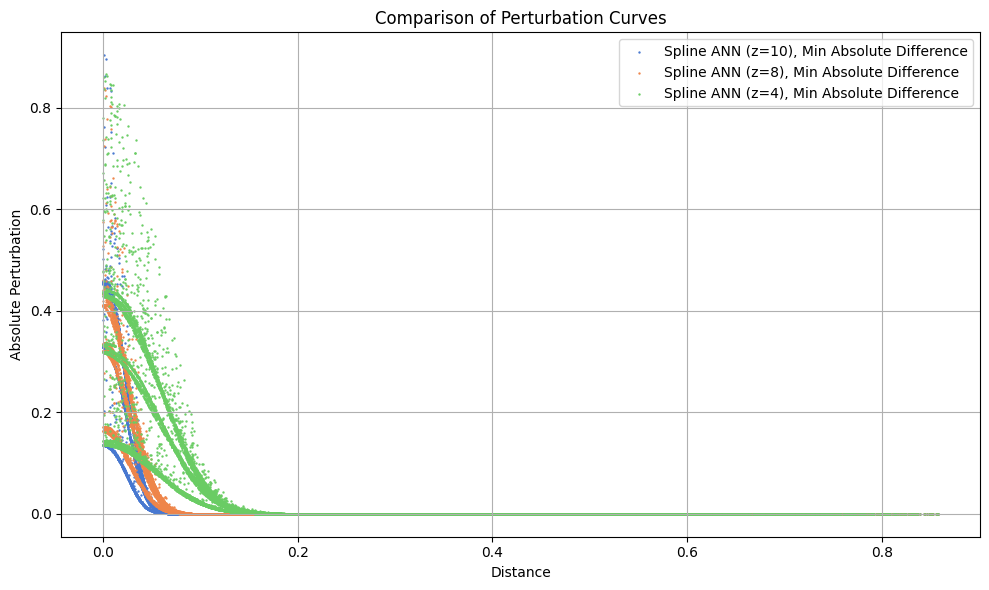

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

def multi_scatterplot(df_dict: dict, 
                      selections: list) -> None:
    """
    Plot multiple scatter plots on the same axes for comparison.

    Parameters:
    - df_dict (dict): Nested dictionary of dataframes.
    - selections (list): A list of selection tuples. Each tuple should have the following format:
        (optimizer_choice, pseudo_rehears_choice, dimension_choice, distance_choice, model_choice)
    """

    plt.figure(figsize=(10, 6))
    labels = get_perturbation_labels()

    # Get colors from the muted Seaborn palette
    colors = sns.color_palette("muted", len(selections))
    
    for idx, sel in enumerate(selections):
        optimizer_choice, pseudo_rehears_choice, dimension_choice, distance_choice, model_choice = sel
        distance_key = ['min_distance', 'max_distance'][distance_choice]
        specific_df = df_dict[dimension_choice][pseudo_rehears_choice][optimizer_choice]
        model_key = f'model_{model_choice}_perturbations'
        
        plt.scatter(specific_df[distance_key], 
                    specific_df[model_key], 
                    c=colors[idx], 
                    label=f'{labels[model_key]}, {labels[distance_key]}',
                    s=0.5)

    plt.title('Comparison of Perturbation Curves')
    plt.ylabel('Absolute Perturbation')
    plt.xlabel('Distance')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
selections = [
    ('sgd', False, 2, 0, 10),
    ('adam', True, 2, 1, 11)
]

# Example usage:
selections = [
    ('sgd', False, 2, 0, 16),
    ('sgd', False, 2, 0, 13),
    ('sgd', False, 2, 0, 10),
]

multi_scatterplot(df_dict, selections)


C:\Users\Heinrich\AppData\Local\Temp\ipykernel_16140\180805129.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(specific_df[distance_key],


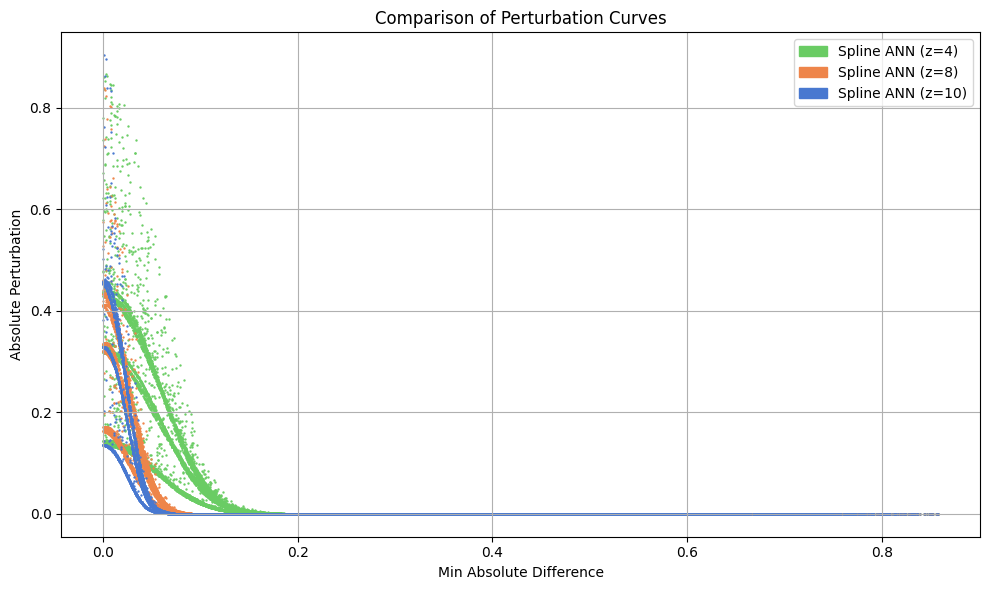

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

def multi_scatterplot(df_dict: dict, selections: list) -> None:
    """
    Plot multiple scatter plots on the same axes for comparison.

    Parameters:
    - df_dict (dict): Nested dictionary of dataframes.
    - selections (list): A list of selection tuples. Each tuple should have the following format:
        (optimizer_choice, pseudo_rehears_choice, dimension_choice, distance_choice, model_choice)
    """
    plt.figure(figsize=(10, 6))
    labels = get_perturbation_labels()

    # Get colors from the muted Seaborn palette
    colors = sns.color_palette("muted", len(selections))
    
    # Using reversed for z-order and manual legend handling
    legend_handles = []
    
    for idx, sel in reversed(list(enumerate(selections))):
        optimizer_choice, pseudo_rehears_choice, dimension_choice, distance_choice, model_choice = sel
        distance_key = ['min_distance', 'max_distance'][distance_choice]
        specific_df = df_dict[dimension_choice][pseudo_rehears_choice][optimizer_choice]
        model_key = f'model_{model_choice}_perturbations'
        
        plt.scatter(specific_df[distance_key], 
                    specific_df[model_key], 
                    c=colors[idx], 
                    s=0.5)
        
        # Create legend handles
        legend_handles.append(Patch(color=colors[idx], label=f'{labels[model_key]}'))

    plt.title('Comparison of Perturbation Curves')
    plt.ylabel('Absolute Perturbation')
    plt.xlabel(f'{labels[distance_key]}')
    plt.legend(handles=legend_handles) # Using custom legend
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
selections = [
    ('sgd', False, 2, 0, 16),
    ('sgd', False, 2, 0, 13),
    ('sgd', False, 2, 0, 10),
]

multi_scatterplot(df_dict, selections)


In [38]:
from typing import List, Union, Set, Tuple

def generate_selections(optimizer_choices: Union[List[str], str] = ['adam', 'sgd'],
                        pseudo_rehears_choices: Union[List[bool], bool] = [True, False],
                        dimension_choices: Union[List[int], int] = list(range(1, 4)),  # Example range
                        distance_choices: Union[List[int], int] = [0, 1],
                        model_choices: Union[List[int], int] = list(range(0, 20))  # Example range
                       ) -> Set[Tuple[str, bool, int, int, int]]:
    """
    Generate combinations of selections based on the parameters provided.
    
    Parameters:
    - optimizer_choices: List of optimizer strings or a single optimizer string. Default is ['adam', 'sgd'].
    - pseudo_rehears_choices: List of boolean values or a single boolean. Default is [True, False].
    - dimension_choices: List of integers or a single integer. Default is a range from 1 to 3 (inclusive).
    - distance_choices: List of integers (0 or 1) or a single integer. Default is [0, 1].
    - model_choices: List of integers or a single integer. Default is a range from 0 to 19 (inclusive).
    
    Returns:
    - A set of tuples, where each tuple is a unique combination of the parameters.
    """
    
    # If single values are provided, convert them to lists
    if not isinstance(optimizer_choices, list):
        optimizer_choices = [optimizer_choices]
    if not isinstance(pseudo_rehears_choices, list):
        pseudo_rehears_choices = [pseudo_rehears_choices]
    if not isinstance(dimension_choices, list):
        dimension_choices = [dimension_choices]
    if not isinstance(distance_choices, list):
        distance_choices = [distance_choices]
    if not isinstance(model_choices, list):
        model_choices = [model_choices]
    
    # Generate combinations using nested loops
    combinations = set()
    for optimizer in optimizer_choices:
        for pseudo in pseudo_rehears_choices:
            for dimension in dimension_choices:
                for distance in distance_choices:
                    for model in model_choices:
                        combinations.add((optimizer, pseudo, dimension, distance, model))
                        
    return combinations

# Example Usage:
selections = generate_selections(optimizer_choices='sgd', 
                                 pseudo_rehears_choices=,
                                 
                                 dimension_choices=[1, 2])
print(selections)


{('sgd', True, 1, 1, 5), ('sgd', True, 1, 0, 7), ('sgd', False, 1, 1, 13), ('sgd', True, 1, 1, 14), ('sgd', True, 1, 0, 16), ('sgd', False, 2, 1, 6), ('sgd', False, 2, 1, 15), ('sgd', False, 1, 0, 5), ('sgd', True, 2, 1, 14), ('sgd', False, 1, 0, 14), ('sgd', False, 2, 0, 1), ('sgd', True, 2, 0, 3), ('sgd', False, 2, 0, 10), ('sgd', False, 2, 0, 19), ('sgd', False, 1, 1, 6), ('sgd', True, 1, 0, 0), ('sgd', True, 1, 1, 7), ('sgd', True, 1, 0, 9), ('sgd', False, 1, 1, 15), ('sgd', True, 1, 1, 16), ('sgd', True, 1, 0, 18), ('sgd', False, 2, 1, 8), ('sgd', False, 2, 1, 17), ('sgd', True, 2, 1, 7), ('sgd', False, 1, 0, 7), ('sgd', True, 2, 1, 16), ('sgd', False, 1, 0, 16), ('sgd', False, 2, 0, 3), ('sgd', False, 2, 0, 12), ('sgd', True, 1, 1, 0), ('sgd', True, 1, 0, 2), ('sgd', False, 1, 1, 8), ('sgd', True, 1, 1, 9), ('sgd', True, 1, 0, 11), ('sgd', False, 2, 1, 1), ('sgd', False, 2, 1, 10), ('sgd', True, 2, 1, 0), ('sgd', False, 1, 0, 0), ('sgd', False, 2, 1, 19), ('sgd', True, 2, 1, 9), 

In [39]:
from typing import List, Union, Set, Tuple, Optional

def generate_selections(optimizer_choices: Optional[Union[List[str], str]] = None,
                        pseudo_rehears_choices: Optional[Union[List[bool], bool]] = None,
                        dimension_choices: Optional[Union[List[int], int]] = None,
                        distance_choices: Optional[Union[List[int], int]] = None,
                        model_choices: Optional[Union[List[int], int]] = None
                       ) -> Set[Tuple[str, bool, int, int, int]]:
    """
    Generate combinations of selections based on the parameters provided.
    
    Parameters:
    - optimizer_choices: List of optimizer strings or a single optimizer string. Default is ['adam', 'sgd'].
    - pseudo_rehears_choices: List of boolean values or a single boolean. Default is [True, False].
    - dimension_choices: List of integers or a single integer. Default is a range from 1 to 3 (inclusive).
    - distance_choices: List of integers (0 or 1) or a single integer. Default is [0, 1].
    - model_choices: List of integers or a single integer. Default is a range from 0 to 19 (inclusive).
    
    Returns:
    - A set of tuples, where each tuple is a unique combination of the parameters.
    """
    
    # Assign default values if None is passed
    if optimizer_choices is None:
        optimizer_choices = ['adam', 'sgd']
    if pseudo_rehears_choices is None:
        pseudo_rehears_choices = [True, False]
    if dimension_choices is None:
        dimension_choices = list(range(1, 4))  # Example range
    if distance_choices is None:
        distance_choices = [0, 1]
    if model_choices is None:
        model_choices = list(range(0, 20))  # Example range
    
    # If single values are provided, convert them to lists
    if not isinstance(optimizer_choices, list):
        optimizer_choices = [optimizer_choices]
    if not isinstance(pseudo_rehears_choices, list):
        pseudo_rehears_choices = [pseudo_rehears_choices]
    if not isinstance(dimension_choices, list):
        dimension_choices = [dimension_choices]
    if not isinstance(distance_choices, list):
        distance_choices = [distance_choices]
    if not isinstance(model_choices, list):
        model_choices = [model_choices]
    
    # Generate combinations using nested loops
    combinations = set()
    for optimizer in optimizer_choices:
        for pseudo in pseudo_rehears_choices:
            for dimension in dimension_choices:
                for distance in distance_choices:
                    for model in model_choices:
                        combinations.add((optimizer, pseudo, dimension, distance, model))
                        
    return combinations

# Example Usage:
selections = generate_selections(optimizer_choices=None, 
                                 pseudo_rehears_choices=None,
                                 dimension_choices=[1, 2])
print(selections)


{('sgd', True, 1, 0, 7), ('sgd', True, 1, 0, 16), ('sgd', True, 2, 1, 14), ('adam', True, 2, 1, 7), ('adam', True, 2, 1, 16), ('adam', False, 2, 0, 19), ('sgd', True, 1, 1, 7), ('sgd', True, 1, 1, 16), ('adam', True, 1, 1, 0), ('sgd', False, 2, 1, 8), ('adam', True, 1, 1, 9), ('adam', False, 2, 1, 2), ('sgd', False, 2, 1, 17), ('adam', False, 2, 1, 11), ('sgd', True, 1, 0, 2), ('sgd', True, 1, 0, 11), ('sgd', True, 2, 1, 0), ('sgd', True, 2, 1, 9), ('sgd', True, 2, 1, 18), ('adam', True, 2, 1, 2), ('adam', True, 2, 1, 11), ('adam', False, 2, 0, 5), ('adam', True, 1, 0, 9), ('adam', False, 2, 0, 14), ('sgd', True, 1, 1, 2), ('adam', True, 1, 0, 18), ('sgd', False, 2, 1, 3), ('sgd', False, 2, 1, 12), ('adam', False, 2, 1, 6), ('adam', False, 2, 1, 15), ('sgd', True, 2, 0, 12), ('sgd', True, 1, 0, 6), ('sgd', True, 1, 0, 15), ('sgd', True, 2, 1, 4), ('sgd', True, 2, 1, 13), ('adam', True, 2, 1, 6), ('adam', True, 2, 1, 15), ('adam', False, 2, 0, 0), ('adam', True, 1, 0, 4), ('adam', False

In [44]:
from typing import List, Union, Set, Tuple, Optional

def generate_selections(optimizer_choices: Optional[Union[List[str], str]] = None,
                        pseudo_rehears_choices: Optional[Union[List[bool], bool]] = None,
                        dimension_choices: Optional[Union[List[int], int]] = None,
                        distance_choices: Optional[Union[List[int], int]] = None,
                        model_choices: Optional[Union[List[int], int]] = None
                       ) -> Set[Tuple[str, bool, int, int, int]]:
    """
    Generate combinations of selections based on the parameters provided.
    
    Parameters:
    - optimizer_choices: List of optimizer strings or a single optimizer string. Default is ['adam', 'sgd'].
    - pseudo_rehears_choices: List of boolean values or a single boolean. Default is [True, False].
    - dimension_choices: List of integers or a single integer. Default is a range from 1 to 3 (inclusive).
    - distance_choices: List of integers (0 or 1) or a single integer. Default is [0, 1].
    - model_choices: List of integers or a single integer. Default is a range from 0 to 19 (inclusive).
    
    Returns:
    - A set of tuples, where each tuple is a unique combination of the parameters.
    """
    
    # Assign default values if None is passed
    if optimizer_choices is None:
        optimizer_choices = ['adam', 'sgd']
    if pseudo_rehears_choices is None:
        pseudo_rehears_choices = [True, False]
    if dimension_choices is None:
        dimension_choices = list(range(1, 4))  # Example range
    if distance_choices is None:
        distance_choices = [0, 1]
    if model_choices is None:
        model_choices = list(range(0, 20))  # Example range
    
    # If single values are provided, convert them to lists
    if not isinstance(optimizer_choices, list):
        optimizer_choices = [optimizer_choices]
    if not isinstance(pseudo_rehears_choices, list):
        pseudo_rehears_choices = [pseudo_rehears_choices]
    if not isinstance(dimension_choices, list):
        dimension_choices = [dimension_choices]
    if not isinstance(distance_choices, list):
        distance_choices = [distance_choices]
    if not isinstance(model_choices, list):
        model_choices = [model_choices]
    
    # Generate combinations using nested loops
    combinations = set()
    for optimizer in optimizer_choices:
        for pseudo in pseudo_rehears_choices:
            for dimension in dimension_choices:
                for distance in distance_choices:
                    for model in model_choices:
                        combinations.add((optimizer, pseudo, dimension, distance, model))
                        
    return combinations

# Example Usage:
selections = selections = generate_selections(optimizer_choices=['adam'], 
                                              pseudo_rehears_choices=None, 
                                              dimension_choices=[2,3,4], 
                                              distance_choices=0, 
                                              model_choices=10)

print(selections)


{('adam', False, 2, 0, 10), ('adam', False, 3, 0, 10), ('adam', True, 2, 0, 10), ('adam', True, 4, 0, 10), ('adam', True, 3, 0, 10), ('adam', False, 4, 0, 10)}


In [46]:
from typing import List, Union, Optional, Tuple

def generate_selections(optimizer_choices: Optional[Union[List[str], str]] = None,
                        pseudo_rehears_choices: Optional[Union[List[bool], bool]] = None,
                        dimension_choices: Optional[Union[List[int], int]] = None,
                        distance_choices: Optional[Union[List[int], int]] = None,
                        model_choices: Optional[Union[List[int], int]] = None
                       ) -> List[Tuple[str, bool, int, int, int]]:
    """
    Generate combinations of selections based on the parameters provided.
    
    Parameters:
    - optimizer_choices: List of optimizer strings or a single optimizer string. Default is ['adam', 'sgd'].
    - pseudo_rehears_choices: List of boolean values or a single boolean. Default is [True, False].
    - dimension_choices: List of integers or a single integer. Default is a range from 1 to 3 (inclusive).
    - distance_choices: List of integers (0 or 1) or a single integer. Default is [0, 1].
    - model_choices: List of integers or a single integer. Default is a range from 0 to 19 (inclusive).
    
    Returns:
    - A list of tuples, where each tuple is a unique combination of the parameters.
    """
    
    # Assign default values if None is passed
    if optimizer_choices is None:
        optimizer_choices = ['adam', 'sgd']
    if pseudo_rehears_choices is None:
        pseudo_rehears_choices = [True, False]
    if dimension_choices is None:
        dimension_choices = list(range(1, 4))  # Example range
    if distance_choices is None:
        distance_choices = [0, 1]
    if model_choices is None:
        model_choices = list(range(0, 20))  # Example range
    
    # If single values are provided, convert them to lists
    if not isinstance(optimizer_choices, list):
        optimizer_choices = [optimizer_choices]
    if not isinstance(pseudo_rehears_choices, list):
        pseudo_rehears_choices = [pseudo_rehears_choices]
    if not isinstance(dimension_choices, list):
        dimension_choices = [dimension_choices]
    if not isinstance(distance_choices, list):
        distance_choices = [distance_choices]
    if not isinstance(model_choices, list):
        model_choices = [model_choices]
    
    # Generate combinations using nested loops
    combinations = []
    for optimizer in optimizer_choices:
        for pseudo in pseudo_rehears_choices:
            for dimension in dimension_choices:
                for distance in distance_choices:
                    for model in model_choices:
                        combo = (optimizer, pseudo, dimension, distance, model)
                        if combo not in combinations:
                            combinations.append(combo)
                        
    return combinations

# Example Usage:
selections = selections = generate_selections(optimizer_choices=['adam'], 
                                              pseudo_rehears_choices=None, 
                                              dimension_choices=[2,3,4], 
                                              distance_choices=0, 
                                              model_choices=10)

print(selections)



[('adam', True, 2, 0, 10), ('adam', True, 3, 0, 10), ('adam', True, 4, 0, 10), ('adam', False, 2, 0, 10), ('adam', False, 3, 0, 10), ('adam', False, 4, 0, 10)]


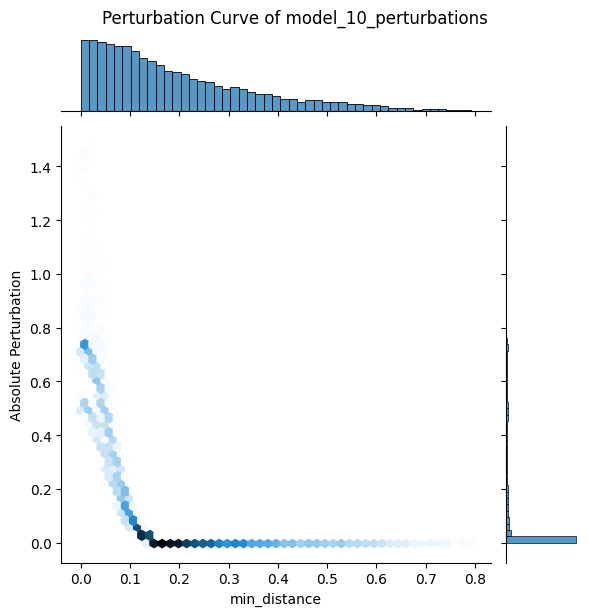

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_perturbation_curve(df_dict: dict, 
                            dimension_choice: int, 
                            pseudo_rehears_choice: bool, 
                            optimizer_choice: str, 
                            distance_choice: int = 0, 
                            model_choice: int = 10) -> None:
    """
    Plot the perturbation curve for a specific optimizer, pseudorehearsal choice, and input dimension.

    Parameters:
    ----------
    df_dict : dict
        Nested dictionary of dataframes with data.
    dimension_choice : int
        Input dimension choice.
    pseudo_rehears_choice : bool
        Whether pseudorehearsal was used.
    optimizer_choice : str
        Optimizer choice ('sgd', 'adam', etc.).
    distance_choice : int, optional (default is 0)
        Distance choice: 0 for min_distance, 1 for max_distance.
    model_choice : int, optional (default is 10)
        Model choice for the perturbation curve.
    """

    distance_keys = ['min_distance', 'max_distance']
    distance_key = distance_keys[distance_choice]

    model_key = f'model_{model_choice}_perturbations'

    specific_df = df_dict[dimension_choice][pseudo_rehears_choice][optimizer_choice]

    def get_perturbation_labels():
        # Note: This function should return appropriate labels for plotting.
        # The implementation details aren't provided in the original snippet,
        # so it's left as a placeholder here.
        return {}

    labels = get_perturbation_labels()

    sns.jointplot(x=distance_key, y=model_key, data=specific_df, kind='hex')
    plt.suptitle(f'Perturbation Curve of {labels.get(model_key, model_key)}', y=1.02)
    plt.ylabel('Absolute Perturbation')
    plt.xlabel(labels.get(distance_key, distance_key))
    plt.show()

# Example usage:
plot_perturbation_curve(df_dict, 2, False, 'sgd', distance_choice=0, model_choice=10)


In [14]:
# Create a dictionary of DataFrames
dataframes_dict = {}
for dim, data in loaded_data_dict.items():
    df = pd.DataFrame(data)
    dataframes_dict[dim] = df

# You can access a specific DataFrame for a dimension like this:
df_dim_1 = dataframes_dict[1]
df_dim_1

,min_distance,max_distance,model_0_perturbations,model_1_perturbations,model_2_perturbations,model_3_perturbations,model_4_perturbations,model_5_perturbations,model_6_perturbations,model_7_perturbations,...,model_9_perturbations,model_10_perturbations,model_11_perturbations,model_12_perturbations,model_13_perturbations,model_14_perturbations,model_15_perturbations,model_16_perturbations,model_17_perturbations,model_18_perturbations
0,0.351778,0.351778,0.295656,0.207154,0.377739,0.359707,0.095651,0.359707,0.113845,0.000795,...,0.000880,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000
1,0.373911,0.373911,0.297725,0.208787,0.377681,0.359707,0.078216,0.359707,0.093085,0.000178,...,0.000197,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000
2,0.263045,0.263045,0.287364,0.200609,0.377888,0.359707,0.177027,0.359707,0.210745,0.013768,...,0.015142,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000
3,0.381473,0.381473,0.298431,0.209345,0.377662,0.359707,0.072653,0.359707,0.086461,0.000084,...,0.000093,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000
4,0.189519,0.189519,0.280492,0.195186,0.377945,0.359707,0.247525,0.359707,0.294663,0.065238,...,0.071678,0.000267,0.0,0.000256,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0.089855,0.089855,0.007144,0.287774,0.225016,0.216921,0.217042,0.216921,0.247552,0.182316,...,0.161895,0.046729,0.0,0.064280,0.000356,0.0,0.000367,7.618219e-07,0.235678,0.000001
149996,0.594924,0.594924,0.003711,0.130246,0.221591,0.216921,0.003739,0.216921,0.004333,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000
149997,0.345975,0.345975,0.005403,0.130246,0.220236,0.216921,0.053051,0.216921,0.060523,0.000793,...,0.000699,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000
149998,0.685636,0.685636,0.003095,0.130246,0.221195,0.216921,0.000617,0.216921,0.000718,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000


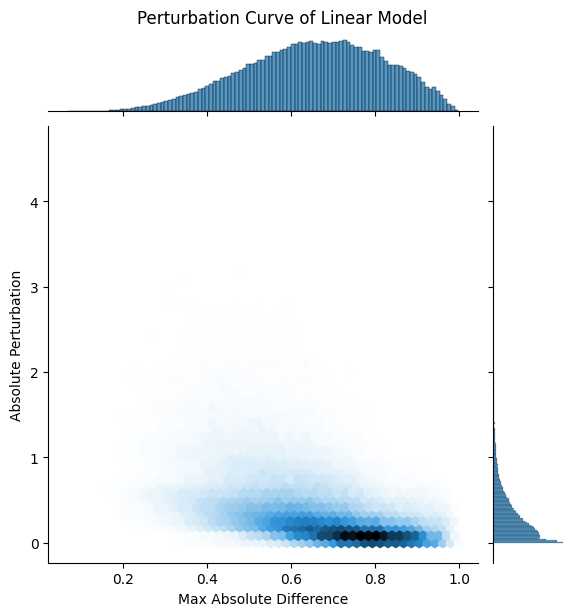

In [49]:
# Alternatively, using jointplot for a scatter plot with histograms

input_dimension = 6
model_choice = 0
distance_choice = 1

distance_key = ['min_distance', 'max_distance'][distance_choice]  # Choose min (0) or max (1)

specific_df = dataframes_dict[input_dimension]

model_key = f'model_{model_choice}_perturbations'

labels = get_perturbation_labels()


sns.jointplot(x=distance_key, y=model_key, data=specific_df, kind='hex')
plt.suptitle(f'Perturbation Curve of {labels[model_key]}', y=1.02)
plt.ylabel('Absolute Perturbation')
plt.xlabel(labels[distance_key])
plt.show()

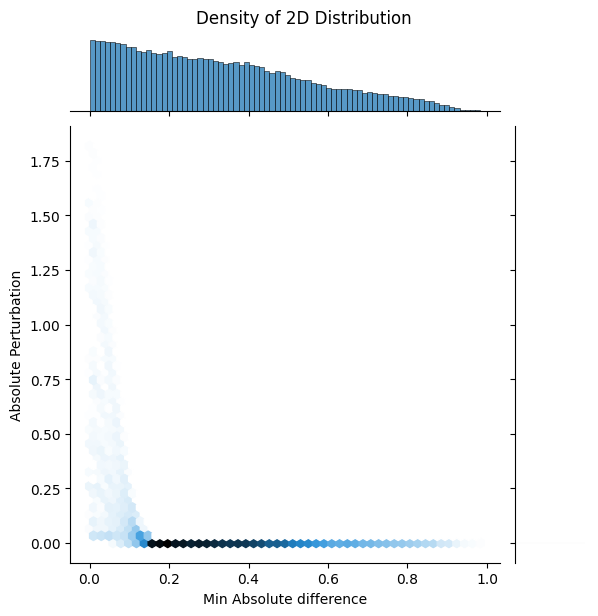

In [19]:
# Parameters
input_dimension = 1
distance = ['min_distance', 'max_distance'][0]  # Choose min (0) or max (1)

# Assuming get_perturbation_labels is your function to get labels
labels = get_perturbation_labels()

# Create a list of model strings based on the labels you have. This skips the distance labels.
list_models = [key for key in labels.keys() if key not in ['min_distance', 'max_distance']]

# For demonstration purposes, let's select the second model (change as needed)
selected_model = list_models[12]

# Plot
sns.jointplot(x=distance, y=selected_model, data=dataframes_dict[input_dimension], kind='hex')
plt.suptitle('Density of 2D Distribution', y=1.02)
plt.ylabel('Absolute Perturbation')
plt.xlabel(labels[distance])  # Use the appropriate label
plt.show()

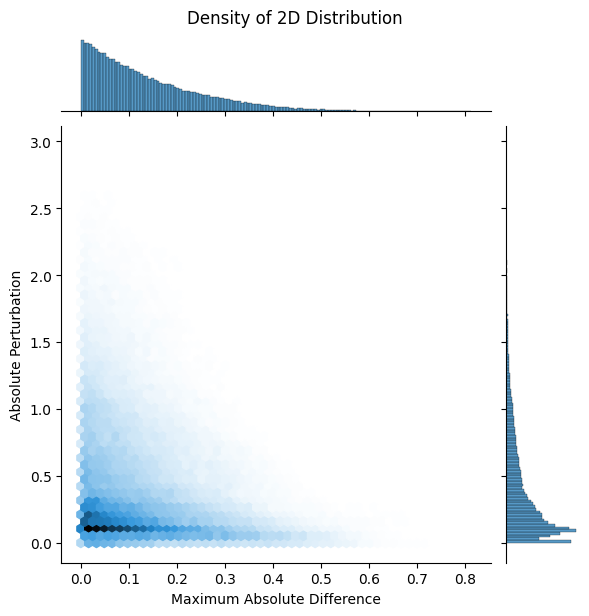

In [33]:

# define procedure

input_dimension = 1

distance = ['min_distance', 'max_distance'][0] #min is 0, max is 1

#list_models = # model strings



sns.jointplot(x='min_distance', y='model_0_perturbations', data=dataframes_dict[3], kind='hex')
plt.suptitle('Density of 2D Distribution', y=1.02)
plt.ylabel('Absolute Perturbation')
plt.xlabel('Maximum Absolute Difference')
plt.show()